**Universidad del Valle**

**Escuela de Imgeniería Sistemas y Computación**

**Maestría en Analítica e Inteligencia de Negocios**

**Minería de datos**

**Laura Andrea Orozco**

# Extreme gradient boosting (Xgboost)
> XGBoost es uno de los algoritmos de aprendizaje automático más populares en estos días. Independientemente del tipo de tarea de predicción en cuestión; regresión o clasificación.



## ¿Qué es?
el XGBoost, es una adaptación del gradient boosting que destaca por su eficiencia y rapidez, por lo que es uno de los algoritmos mas usados en la actualidad, y es importante mencionar que se encuentra implementado en diferentes lenguajes y entornos de programación.

## ¿Cómo funciona?
Durante la fase de entrenamiento, los parámetros de cada uno de los modelos son ajustados de manera iterativa tratando de encontrar el mínimo de una función objetivo, que puede ser la proporción del error en los problemas de clasificación, el área bajo la curva, la raíz del error cuadrático medio o alguna otra.
Cada modelo es comparado con el anterior, si un nuevo modelo tiene mejor resultado entonces se toma este como base parea realizar mas ajustes y modificaciones, si por el contrario no se tienen mejores resultados se regresa el mejor modelo anterior. Este proceso se repite hasta llegar a un punto en el que la diferencia entre modelos consecutivos es insignificante, lo cual nos indica que hemos encontrado el mejor modelo posible.

Durante gran parte de este curso, ha realizado predicciones con el método de bosque aleatorio, que logra un mejor rendimiento que un solo árbol de decisión simplemente promediando las predicciones de muchos árboles de decisión.

Nos referimos al método de bosque aleatorio como un "método de conjunto". Por definición, los métodos de conjunto combinan las predicciones de varios modelos (por ejemplo, varios árboles, en el caso de bosques aleatorios).


![Image of Yaktocat](https://pluralsight2.imgix.net/guides/a9a5ff4e-b617-4afe-b27b-d96793defa87_6.jpg)

## Algortimo/Ciclo

- Primero, usamos el conjunto actual para generar predicciones para cada observación en el conjunto de datos. Para hacer una predicción, agregamos las predicciones de todos los modelos en el conjunto.

- Estas predicciones se utilizan para calcular una función de pérdida (como el error cuadrático medio, por ejemplo).

- Luego, usamos la función de pérdida para ajustar un nuevo modelo que se agregará al conjunto. Específicamente, determinamos los parámetros del modelo para que la adición de este nuevo modelo al conjunto reduzca la pérdida. 

- Finalmente, agregamos el nuevo modelo al conjunto, y ...

- ... ¡repetir!


![Image of Yaktocat](https://i.imgur.com/MvCGENh.png)


## Los datos

**Contexto**

El sector inmobiliario de Melbourne está en auge. ¿Puede encontrar la información o predecir la próxima gran tendencia para convertirse en un magnate inmobiliario ... o incluso más difícil, adquirir una unidad de 2 dormitorios a un precio razonable?

**Contenido** 
Esta es una base de datos de un conjunto de datos creado por Tony Pino.
El conjunto de datos incluye Dirección, Tipo de inmueble, Suburbio, Método de venta, Habitaciones, Precio, Agente de bienes raíces, Fecha de venta y distancia desde C.B.D.

**Descripción de las variables**

Habitaciones: Número de habitaciones

Precio: Precio en dólares

Método: S - propiedad vendida; SP - propiedad vendida antes; PI - propiedad transferida; PN - vendido antes no revelado; SN - vendido no revelado; NB - sin oferta; VB - oferta del proveedor; W - retirado antes de la subasta; SA - vendido después de subasta; SS - vendido después del precio de subasta no revelado. N / A - precio o oferta más alta no disponible.

Tipo: br - dormitorio (s); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; dev site - sitio de desarrollo; o res - otro residencial.

VendedorG: Agente de bienes raíces

Fecha: fecha de venta

Distancia: Distancia del CBD

Nombre de la región: Región general (Oeste, Noroeste, Norte, Noreste ... etc.)

Propertycount: Número de propiedades que existen en el suburbio.

Dormitorio 2: número de dormitorios raspado (de una fuente diferente)

Baño: Cantidad de baños

Coche: Número de plazas

Tamaño del terreno: Tamaño del terreno

BuildingArea: Tamaño del edificio

CouncilArea: Consejo de Gobierno del área

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/melb_data.csv')


### Analisis descriptivo

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
data.shape

(13580, 21)

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
data.isnull().sum()/len(data)

Suburb          0.00
Address         0.00
Rooms           0.00
Type            0.00
Price           0.00
Method          0.00
SellerG         0.00
Date            0.00
Distance        0.00
Postcode        0.00
Bedroom2        0.00
Bathroom        0.00
Car             0.00
Landsize        0.00
BuildingArea    0.47
YearBuilt       0.40
CouncilArea     0.10
Lattitude       0.00
Longtitude      0.00
Regionname      0.00
Propertycount   0.00
dtype: float64

In [ ]:
data.dropna().shape

(6196, 21)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.00,2.94,0.96,1.00,2.00,3.00,3.00,10.00
Price,13580.00,1075684.08,639310.72,85000.00,650000.00,903000.00,1330000.00,9000000.00
Distance,13580.00,10.14,5.87,0.00,6.10,9.20,13.00,48.10
Postcode,13580.00,3105.30,90.68,3000.00,3044.00,3084.00,3148.00,3977.00
Bedroom2,13580.00,2.91,0.97,0.00,2.00,3.00,3.00,20.00
Bathroom,13580.00,1.53,0.69,0.00,1.00,1.00,2.00,8.00
Car,13518.00,1.61,0.96,0.00,1.00,2.00,2.00,10.00
Landsize,13580.00,558.42,3990.67,0.00,177.00,440.00,651.00,433014.00
BuildingArea,7130.00,151.97,541.01,0.00,93.00,126.00,174.00,44515.00
YearBuilt,8205.00,1964.68,37.27,1196.00,1940.00,1970.00,1999.00,2018.00


In [ ]:
data.describe(include="O").T

,count,unique,top,freq
Suburb,13580,314,Reservoir,359
Address,13580,13378,53 William St,3
Type,13580,3,h,9449
Method,13580,5,S,9022
SellerG,13580,268,Nelson,1565
Date,13580,58,27/05/2017,473
CouncilArea,12211,33,Moreland,1163
Regionname,13580,8,Southern Metropolitan,4695


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


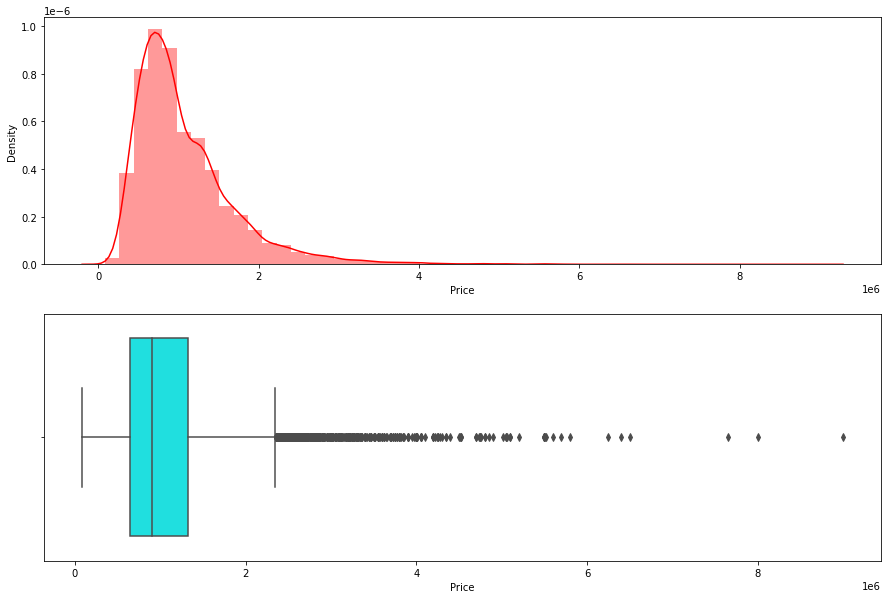

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


fig=plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
fig1 = sns.distplot(data['Price'],color='red')

plt.subplot(2,1,2)
fig2 = sns.boxplot(data=data,x='Price',color='aqua')

### Ajuste del modelo XGboost

In [ ]:
# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'Car', 'Bathroom']
X = data[cols_to_use]

# Select target
y = data.Price

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)



from xgboost import XGBRegressor
import xgboost as xgb

my_model = XGBRegressor(objective ='reg:linear')
my_model.fit(X_train, y_train)

[17:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

rmse = np.sqrt(mean_squared_error(y_valid, predictions))
print("RMSE: %f" % (rmse))

Mean Absolute Error: 271047.13816273934
RMSE: 421515.906223


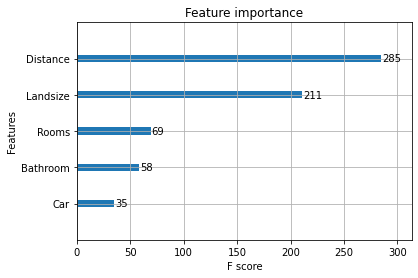

In [ ]:
xgb.plot_importance(my_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


In [ ]:
y_pred = pd.DataFrame(my_model.predict(X_valid), index = y_valid.index)
resultados = pd.concat([y_valid, y_pred], axis=1)
resultados = resultados.rename(columns={0:"Price_hat"})
resultados["error"] = abs(resultados["Price"] -  resultados["Price_hat"])
resultados = resultados.join(X_valid)
resultados

,Price,Price_hat,error,Rooms,Distance,Landsize,Car,Bathroom
5169,779000.00,1215995.88,436995.88,3,11.20,945.00,2.00,1.00
4188,1191000.00,894615.19,296384.81,2,14.60,756.00,2.00,1.00
9393,820000.00,1484498.38,664498.38,4,10.50,604.00,1.00,2.00
142,1525000.00,1630436.25,105436.25,5,13.80,729.00,3.00,3.00
8838,726500.00,950827.25,224327.25,3,8.80,593.00,0.00,1.00
...,...,...,...,...,...,...,...,...
1295,792000.00,849006.00,57006.00,2,5.20,149.00,1.00,1.00
7296,660000.00,1174759.75,514759.75,4,13.90,697.00,1.00,1.00
703,1260000.00,1386110.88,126110.88,4,13.00,793.00,2.00,2.00
6041,650000.00,796564.25,146564.25,3,13.30,476.00,2.00,1.00


In [ ]:
resultados["error"].mean()

271047.13816273934

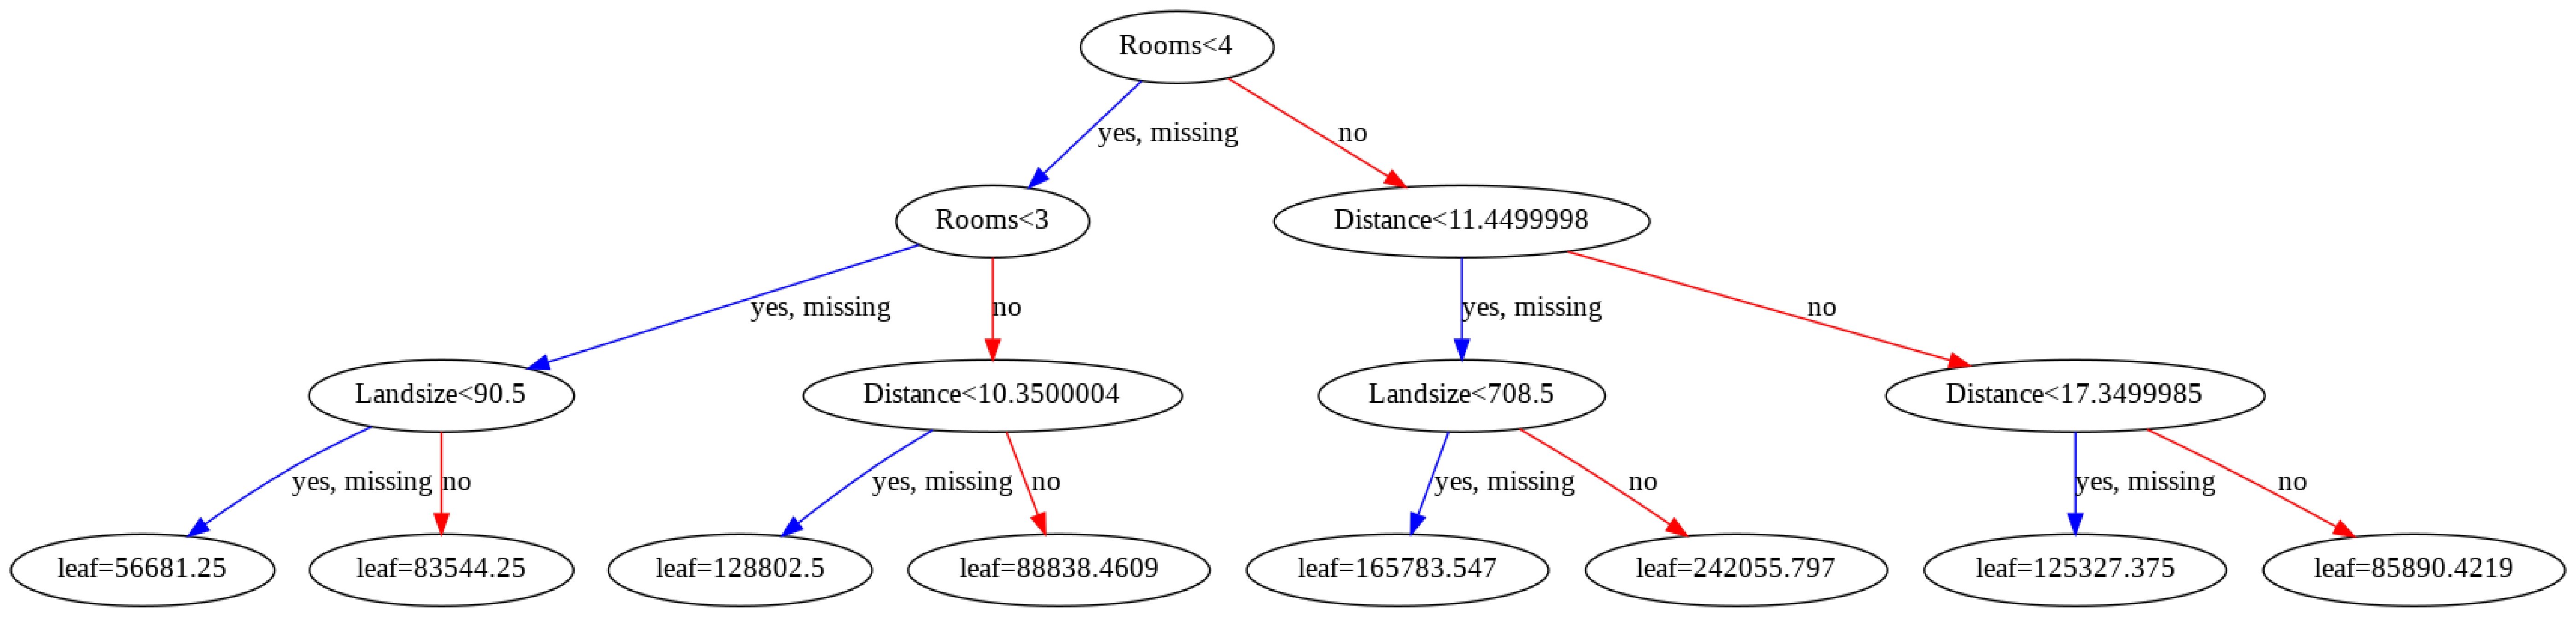

In [ ]:
xgb.plot_tree(my_model,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

### Ajuste de hiperparametros



**n_estimators:** especifica cuántas veces pasar por el ciclo de modelado descrito anteriormente. Es igual a la cantidad de modelos que incluimos en el conjunto.

**early_stopping_rounds:** ofrece una forma de encontrar automáticamente el valor ideal para n_estimators. La detención anticipada hace que el modelo deje de iterar cuando la puntuación de validación deja de mejorar, incluso si no estamos en la parada difícil para n_estimators.

**learning_rate:** En lugar de obtener predicciones simplemente sumando las predicciones de cada modelo de componente, podemos multiplicar las predicciones de cada modelo por un número pequeño (conocido como tasa de aprendizaje) antes de agregarlas.

**max_depth:** cuantos y que tanto se permite que un árbol crezca.

**seed:** para la reproducibilidad de los resultados.

**n_jobs:**
En conjuntos de datos más grandes donde el tiempo de ejecución es una consideración, puede usar el paralelismo para construir sus modelos más rápido. Es común establecer el parámetro n_jobs igual al número de núcleos en su máquina. En conjuntos de datos más pequeños, esto no ayudará.




![Image of Yaktocat](https://miro.medium.com/max/1200/1*FIIGhzbuTo2vI62mFcbMTg.png)


### Ajuste de hiperparametros para mejorar el rendimiento de métricas

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators'  : [10, 100, 200, 500, 1000],
              'max_depth': [5, 10, 15],
              'learning_rate' : [0.01, 0.1, 0.3, 0.5],
             }


eval_s = [(X_train, y_train), (X_valid, y_valid)]
evals_result = {}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = XGBRegressor(random_state=123),
        param_grid = param_grid,
        scoring    = 'r2', 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

%time grid.fit(X = X_train, y = y_train, eval_set=eval_s)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[207]	validation_0-rmse:203793	validation_1-rmse:466009
[208]	validation_0-rmse:203793	validation_1-rmse:466008
[209]	validation_0-rmse:203793	validation_1-rmse:466008
[210]	validation_0-rmse:203793	validation_1-rmse:466008
[211]	validation_0-rmse:203793	validation_1-rmse:466008
[212]	validation_0-rmse:203793	validation_1-rmse:466008
[213]	validation_0-rmse:203793	validation_1-rmse:466009
[214]	validation_0-rmse:203793	validation_1-rmse:466009
[215]	validation_0-rmse:203793	validation_1-rmse:466009
[216]	validation_0-rmse:203793	validation_1-rmse:466009
[217]	validation_0-rmse:203793	validation_1-rmse:466009
[218]	validation_0-rmse:203793	validation_1-rmse:466009
[219]	validation_0-rmse:203793	validation_1-rmse:466009
[220]	validation_0-rmse:203793	validation_1-rmse:466009
[221]	validation_0-rmse:203793	validation_1-rmse:466009
[222]	validation_0-rmse:203793	validation_1-rmse:466009
[223]	validation_0-rmse:203793	valida

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
17,0.10,5,200,0.65,0.01,0.78,0.00
18,0.10,5,500,0.65,0.01,0.85,0.00
31,0.30,5,100,0.64,0.01,0.81,0.00
16,0.10,5,100,0.63,0.01,0.72,0.00


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200} : 0.6487260858521541 r2


In [ ]:
modelo_final_xgboost = grid.best_estimator_

In [ ]:
predictions = modelo_final_xgboost.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 239093.92130430782


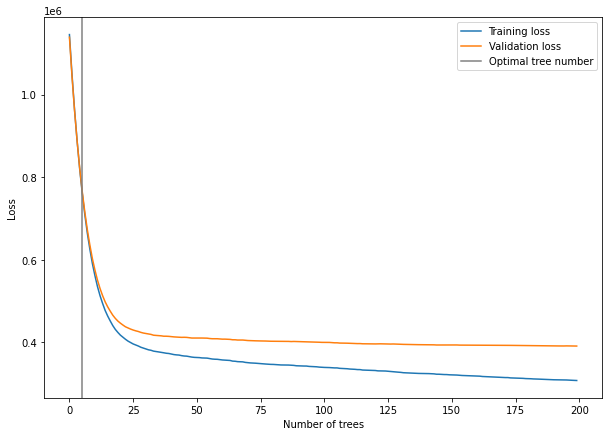

In [ ]:
results = modelo_final_xgboost.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(5, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

### Ajuste de hiperparámetros para mejorar el rendimiento computacional

In [ ]:
model = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=20)

[19:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.14507e+06	validation_1-rmse:1.1387e+06
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1.04908e+06	validation_1-rmse:1.04459e+06
[2]	validation_0-rmse:963720	validation_1-rmse:961457
[3]	validation_0-rmse:888357	validation_1-rmse:888192
[4]	validation_0-rmse:821292	validation_1-rmse:823109
[5]	validation_0-rmse:762449	validation_1-rmse:766268
[6]	validation_0-rmse:710957	validation_1-rmse:717118
[7]	validation_0-rmse:665148	validation_1-rmse:673465
[8]	validation_0-rmse:625972	validation_1-rmse:636131
[9]	validation_0-rmse:590862	validation_1-rmse:602710
[10]	validation_0-rmse:561569	validation_1-rmse:575188
[11]	validation_0-rmse:535076	validation_1-rmse:550719
[12]	validation_0-rmse:513113	validation_1-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 239110.21937131812


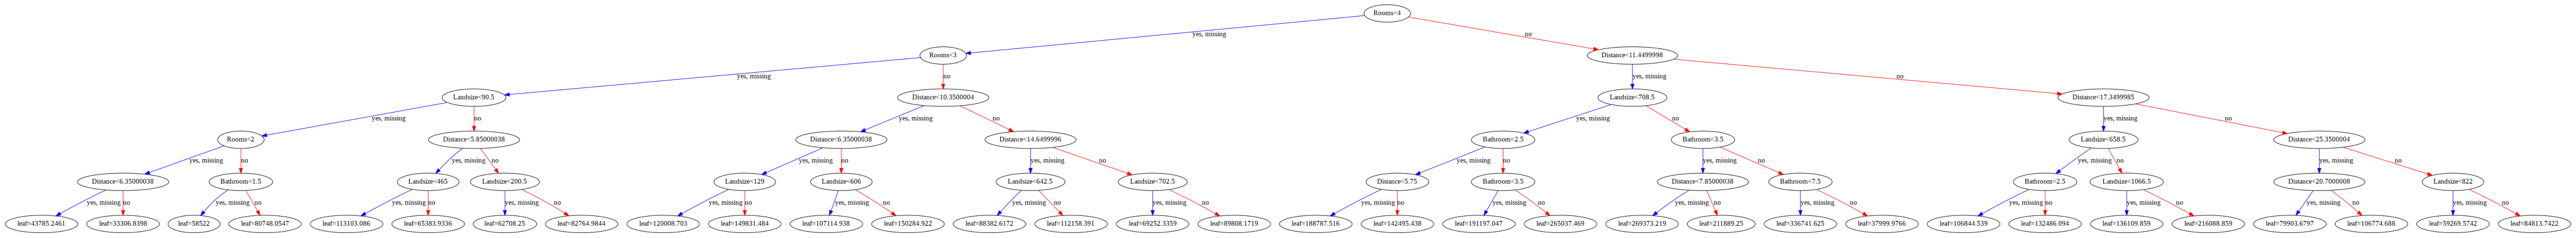

In [ ]:
xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [900, 900]
plt.show()

**Pensamientos del ejercicio**

- Xgboost es realmente fácil de usar. 

- La técnica de *detención anticipada* es usada para evitar el sobreajuste, simplemente establezca el early_stopping_rounds argumento durante fit(). 

- Los hiperparametros son los valores de las configuraciones utilizados durante el proceso de entrenamiento, por lo tanto, estos no se obtienen por los datos.

- El correcto ajuste de estos hiperparametros se ven reflejados en la velocidad y rendimiento de los resultados.
